In [1]:
import torch
from torch import nn
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [2]:
# Create the model class

class AutoEncoderV2(nn.Module):
    def __init__(self):
        super().__init__()

        self.encoder = nn.Sequential(
            nn.Flatten(start_dim=0),
            # Encoder
            nn.Linear(in_features=256*256*3, out_features=1024), 
            nn.ReLU(),
            nn.Linear(in_features=1024, out_features=512),
            nn.ReLU(),
            nn.Linear(in_features=512, out_features=256),
            nn.ReLU(),
            nn.Linear(in_features=256, out_features=128), # -> latent space: 256 -> 128
        )

        self.decoder = nn.Sequential(
            nn.Linear(in_features=128, out_features=256), 
            nn.ReLU(),
            nn.Linear(in_features=256, out_features=512),
            nn.ReLU(),
            nn.Linear(in_features=512, out_features=1024),
            nn.ReLU(),
            nn.Linear(in_features=1024, out_features=256*256*3),
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x



auto_encoder_model = AutoEncoderV2().to(device)

In [3]:
from torchvision import transforms
from PIL import Image

image_transform = transforms.Compose([
    transforms.Resize(size=(256, 256)),
    transforms.ToTensor()
])

test_image = Image.open('image.jpg')
test_image.height, test_image.width

test_image = image_transform(test_image)
test_image.shape

torch.Size([3, 256, 256])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.07673192..0.07384477].


torch.Size([128])
torch.Size([196608])


torch.Size([3, 256, 256])

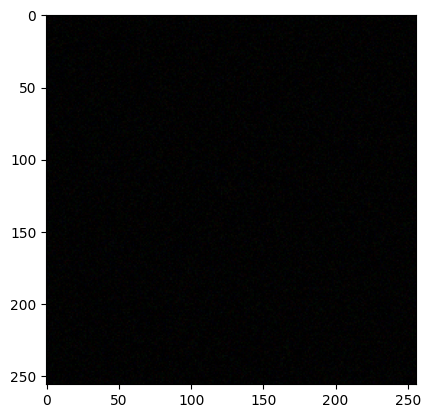

In [4]:
import matplotlib.pyplot as plt

output = auto_encoder_model.encoder(test_image.to(device))
print(output.shape)
output = auto_encoder_model.decoder(output.to(device))
print(output.shape)

output = output.reshape(3, 256, 256)
plt.imshow(output.detach().cpu().permute(1, 2, 0))
output.shape

In [5]:
flatten_transform = nn.Flatten(start_dim=0)
flat_test_image = flatten_transform(test_image)
print(flat_test_image.shape)
flat_test_image = flat_test_image.to(device)

torch.Size([196608])


In [6]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(params=auto_encoder_model.parameters(), lr=0.001)

In [7]:

# Training the autoencoder

num_epochs = 15

for epoch in range(num_epochs):
    # forward pass
    
    reconstructed_image = auto_encoder_model(test_image.to(device))
    loss = criterion(reconstructed_image, flat_test_image)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


    if (epoch+1) % 5 == 0:
        print(f'Epoch Count: {epoch+1}/{num_epochs} | Loss: {loss:.4f}')

Epoch Count: 5/15 | Loss: 0.0806
Epoch Count: 10/15 | Loss: 0.1312
Epoch Count: 15/15 | Loss: 0.0580


torch.Size([128])


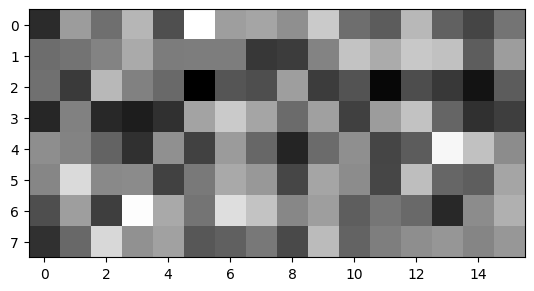

In [8]:
output_at = auto_encoder_model.encoder(test_image.to(device))
print(output_at.shape)
# output = auto_encoder_model_onep.decoder(output.to(device))
# print(output.shape)

# output = output.reshape(3, 256, 256)
# plt.imshow(output.detach().cpu().permute(1, 2, 0))
# output.shape

output_at = output_at.reshape(1, 8, 16)
plt.imshow(output_at.detach().cpu().permute(1, 2, 0), cmap='grey')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.38051906..1.3690704].


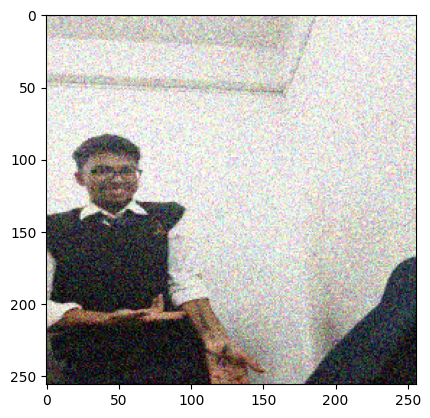

In [9]:
output = auto_encoder_model(test_image.to(device))
output.shape
output = output.reshape(3, 256, 256)
output = output.permute(1, 2, 0).detach().cpu()
plt.imshow(output)